# Preparación de entorno y dataset

In [ ]:
! pip install pyarrow
! pip install -q kaggle
! pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
pd.options.display.float_format = '{:20,.4f}'.format # suprimimos la notacion cientifica en los outputs

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hangyeolkoo","key":"4032f7e1f591049aec886c05d7504de2"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download vpn-classification -f dataset_v2/train.parq

 96% 543M/564M [00:02<00:00, 171MB/s]
100% 564M/564M [00:02<00:00, 214MB/s]


In [ ]:
! kaggle competitions download vpn-classification -f dataset_v2/test.parq

 94% 154M/164M [00:00<00:00, 248MB/s]
100% 164M/164M [00:00<00:00, 216MB/s]


In [ ]:
! kaggle competitions download vpn-classification -f dataset_v2/shodan_df_hashed.csv

  0% 0.00/2.11M [00:00<?, ?B/s]
100% 2.11M/2.11M [00:00<00:00, 142MB/s]


In [ ]:
! unzip train.parq.zip

Archive:  train.parq.zip
  inflating: train.parq              


In [ ]:
! unzip test.parq.zip

Archive:  test.parq.zip
  inflating: test.parq               


In [ ]:
! unzip shodan_df_hashed.csv.zip

Archive:  shodan_df_hashed.csv.zip
  inflating: shodan_df_hashed.csv    


## Manejo de train y test dataset

In [ ]:
train = pd.read_parquet("train.parq",engine="auto")
test = pd.read_parquet("test.parq",engine="auto")

**Imputo los valores nulos**

Por cuestiones de perfomance se decidió crear un propio Imputer, que rellena los NaNs con los datos más frecuentes.

In [ ]:
class MostFrequentImputer:
    def __init__(self):
        self.most_frequent_values = None

    def fit(self, df):
        self.most_frequent_values = {col: df[col].mode().iloc[0] for col in df.columns}
        return self

    def transform(self, df):
        for col, value in self.most_frequent_values.items():
            df[col] = df[col].fillna(value)
        return df

In [ ]:
imputer = MostFrequentImputer()

test_columns = test.columns

imputer.fit(test)
imputer.transform(test)

,attack_time,watcher_country,watcher_as_num,watcher_as_name,attacker_country,attacker_as_num,attacker_as_name,attack_type,watcher_uuid_enum,attacker_ip_enum
0,2023-07-31 07:17:58+00:00,US,"54,641.0000",IMH-IAD,IN,"14,061.0000",DIGITALOCEAN-ASN,http:spam,1,7696
1,2023-07-31 07:17:58+00:00,US,"54,641.0000",IMH-IAD,IN,"14,061.0000",DIGITALOCEAN-ASN,http:exploit,1,7696
2,2023-07-31 07:17:58+00:00,US,"54,641.0000",IMH-IAD,IN,"14,061.0000",DIGITALOCEAN-ASN,http:bruteforce,1,7696
3,2023-07-31 07:17:58+00:00,US,"54,641.0000",IMH-IAD,IN,"14,061.0000",DIGITALOCEAN-ASN,http:bruteforce,1,7696
4,2023-07-31 07:17:51+00:00,US,"396,982.0000",GOOGLE-CLOUD-PLATFORM,US,"53,667.0000",PONYNET,http:bruteforce,3,7543
...,...,...,...,...,...,...,...,...,...,...
18682292,2023-08-24 21:14:42+00:00,DE,"12,897.0000",ENTEGA Medianet GmbH,DE,"3,320.0000",Deutsche Telekom AG,http:scan,24879,198081
18682293,2023-08-24 21:14:52+00:00,DE,"12,897.0000",ENTEGA Medianet GmbH,DE,"3,320.0000",Deutsche Telekom AG,http:scan,24879,198081
18682294,2023-08-24 21:14:42+00:00,DE,"12,897.0000",ENTEGA Medianet GmbH,DE,"3,320.0000",Deutsche Telekom AG,http:scan,24879,198081
18682295,2023-08-24 21:14:42+00:00,DE,"12,897.0000",ENTEGA Medianet GmbH,DE,"3,320.0000",Deutsche Telekom AG,http:scan,24879,198081


In [ ]:
train.head()

,attack_time,watcher_country,watcher_as_num,watcher_as_name,attacker_country,attacker_as_num,attacker_as_name,attack_type,watcher_uuid_enum,attacker_ip_enum,label
0,2023-07-31 07:17:51+00:00,DE,"34,011.0000",Host Europe GmbH,TR,"47,721.0000",Murat Aktas,http:exploit,0,6466,0
1,2023-07-31 07:17:51+00:00,DE,"34,011.0000",Host Europe GmbH,TR,"47,721.0000",Murat Aktas,http:spam,0,6466,0
2,2023-07-31 07:17:49+00:00,DE,"20,886.0000",bn:t Blatzheim Networks Telecom GmbH,DE,"51,167.0000",Contabo GmbH,http:bruteforce,2,4637,0
3,2023-07-31 07:17:49+00:00,DE,"20,886.0000",bn:t Blatzheim Networks Telecom GmbH,DE,"51,167.0000",Contabo GmbH,http:spam,2,4637,0
4,2023-07-31 07:17:49+00:00,DE,"20,886.0000",bn:t Blatzheim Networks Telecom GmbH,DE,"51,167.0000",Contabo GmbH,http:exploit,2,4637,0


In [ ]:
train.isna().sum().sum()

822426

In [ ]:
train['label'].value_counts()

0    60594448
1     1035237
Name: label, dtype: int64

In [ ]:
train = train.dropna()

In [ ]:
train['label'].value_counts()

0    60135084
1     1026672
Name: label, dtype: int64

In [ ]:
train = train.drop(columns=['watcher_as_name','attacker_as_name'])
test = test.drop(columns=['watcher_as_name','attacker_as_name'])
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61161756 entries, 0 to 61629684
Data columns (total 9 columns):
 #   Column             Dtype              
---  ------             -----              
 0   attack_time        datetime64[ns, UTC]
 1   watcher_country    category           
 2   watcher_as_num     float32            
 3   attacker_country   category           
 4   attacker_as_num    float32            
 5   attack_type        category           
 6   watcher_uuid_enum  int32              
 7   attacker_ip_enum   int32              
 8   label              int8               
dtypes: category(3), datetime64[ns, UTC](1), float32(2), int32(2), int8(1)
memory usage: 2.2 GB


Las columnas que aportan informaciones equivalentes a otra ya existente fueron descartadas.

## Conversión de features

In [ ]:
train['day_of_week'] = train['attack_time'].dt.day_name()
train['hour'] = train['attack_time'].dt.hour

test['day_of_week'] = test['attack_time'].dt.day_name()
test['hour'] = test['attack_time'].dt.hour

In [ ]:
train[['service', 'threat_type']] = train['attack_type'].str.split(':', expand=True)

test[['service', 'threat_type']] = test['attack_type'].str.split(':', expand=True)

In [ ]:
train['same_country'] = (train['attacker_country'].astype('str') == train['watcher_country'].astype('str')).astype(int)
test['same_country'] = (test['attacker_country'].astype('str') == test['watcher_country'].astype('str')).astype(int)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61161756 entries, 0 to 61629684
Data columns (total 14 columns):
 #   Column             Dtype              
---  ------             -----              
 0   attack_time        datetime64[ns, UTC]
 1   watcher_country    category           
 2   watcher_as_num     float32            
 3   attacker_country   category           
 4   attacker_as_num    float32            
 5   attack_type        category           
 6   watcher_uuid_enum  int32              
 7   attacker_ip_enum   int32              
 8   label              int8               
 9   day_of_week        object             
 10  hour               int64              
 11  service            object             
 12  threat_type        object             
 13  same_country       int64              
dtypes: category(3), datetime64[ns, UTC](1), float32(2), int32(2), int64(2), int8(1), object(3)
memory usage: 4.4+ GB


In [ ]:
train['day_of_week'] = train['day_of_week'].astype('category')
train['hour'] = train['hour'].astype('int8')
train['service'] = train['service'].astype('category')
train['threat_type'] = train['threat_type'].astype('category')
train['same_country'] = train['same_country'].astype('category')

test['day_of_week'] = test['day_of_week'].astype('category')
test['hour'] = test['hour'].astype('int8')
test['service'] = test['service'].astype('category')
test['threat_type'] = test['threat_type'].astype('category')
test['same_country'] = test['same_country'].astype('category')

In [ ]:
def map_day_to_int(day):
  list_days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
  for i in range(7):
    if day == list_days[i]:
      return i
  return day

In [ ]:
train['day_of_week'] = train['day_of_week'].map(map_day_to_int)

test['day_of_week'] = test['day_of_week'].map(map_day_to_int)

In [ ]:
train['day_of_week'] = train['day_of_week'].astype('int8')

test['day_of_week'] = test['day_of_week'].astype('int8')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61161756 entries, 0 to 61629684
Data columns (total 14 columns):
 #   Column             Dtype              
---  ------             -----              
 0   attack_time        datetime64[ns, UTC]
 1   watcher_country    category           
 2   watcher_as_num     float32            
 3   attacker_country   category           
 4   attacker_as_num    float32            
 5   attack_type        category           
 6   watcher_uuid_enum  int32              
 7   attacker_ip_enum   int32              
 8   label              int8               
 9   day_of_week        int8               
 10  hour               int8               
 11  service            category           
 12  threat_type        category           
 13  same_country       category           
dtypes: category(6), datetime64[ns, UTC](1), float32(2), int32(2), int8(3)
memory usage: 2.4 GB


In [ ]:
train = train.drop(columns=['attack_time'])

test = test.drop(columns=['attack_time'])

In [ ]:
train.head()

,watcher_country,watcher_as_num,attacker_country,attacker_as_num,attack_type,watcher_uuid_enum,attacker_ip_enum,label,day_of_week,hour,service,threat_type,same_country
0,DE,"34,011.0000",TR,"47,721.0000",http:exploit,0,6466,0,0,7,http,exploit,0
1,DE,"34,011.0000",TR,"47,721.0000",http:spam,0,6466,0,0,7,http,spam,0
2,DE,"20,886.0000",DE,"51,167.0000",http:bruteforce,2,4637,0,0,7,http,bruteforce,1
3,DE,"20,886.0000",DE,"51,167.0000",http:spam,2,4637,0,0,7,http,spam,1
4,DE,"20,886.0000",DE,"51,167.0000",http:exploit,2,4637,0,0,7,http,exploit,1


In [ ]:
train_grouped_by_ip_enum = train.groupby('attacker_ip_enum').agg({
    'watcher_country': lambda x: x.mode().iat[0],
    'watcher_as_num': lambda x: x.mode().iat[0],
    'attacker_country': lambda x: x.mode().iat[0],
    'attacker_as_num': lambda x: x.mode().iat[0],
    'attack_type': lambda x: x.mode().iat[0],
    'watcher_uuid_enum': lambda x: x.mode().iat[0],
    'label': lambda x: x.mode().iat[0],
    'day_of_week': 'mean',
    'hour': 'mean',
    'service': lambda x: x.mode().iat[0],
    'threat_type': lambda x: x.mode().iat[0],
    'same_country': lambda x: x.mode().iat[0]
}).reset_index()

test_grouped_by_ip_enum = test.groupby('attacker_ip_enum').agg({
    'watcher_country': lambda x: x.mode().iat[0],
    'watcher_as_num': lambda x: x.mode().iat[0],
    'attacker_country': lambda x: x.mode().iat[0],
    'attacker_as_num': lambda x: x.mode().iat[0],
    'attack_type': lambda x: x.mode().iat[0],
    'watcher_uuid_enum': lambda x: x.mode().iat[0],
    'day_of_week': 'mean',
    'hour': 'mean',
    'service': lambda x: x.mode().iat[0],
    'threat_type': lambda x: x.mode().iat[0],
    'same_country': lambda x: x.mode().iat[0]
}).reset_index()

train_grouped_by_ip_enum

,attacker_ip_enum,watcher_country,watcher_as_num,attacker_country,attacker_as_num,attack_type,watcher_uuid_enum,label,day_of_week,hour,service,threat_type,same_country
0,0,US,"14,061.0000",US,"14,618.0000",http:scan,18401,0,4.0000,17.7692,http,scan,0
1,1,US,"3,303.0000",BR,"27,699.0000",http:exploit,8646,0,1.0000,14.1000,http,exploit,0
2,2,DE,"12,897.0000",DE,"3,320.0000",http:scan,24879,0,3.0862,11.2241,http,scan,1
3,3,DE,"12,897.0000",VE,"21,826.0000",http:exploit,24879,0,3.6818,13.5909,http,exploit,0
4,4,US,"396,982.0000",SA,"25,019.0000",http:exploit,1828,0,3.3235,19.0882,http,exploit,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
147644,199959,US,"46,606.0000",CN,"4,134.0000",http:scan,4206,0,3.4286,8.2857,http,scan,0
147645,199960,FR,"48,896.0000",BR,"10,429.0000",ssh:bruteforce,21,0,2.7778,6.6667,ssh,bruteforce,0
147646,199961,US,"16,509.0000",CN,"58,461.0000",http:scan,1253,0,5.1111,9.0000,http,scan,0
147647,199963,JP,"37,907.0000",JP,"131,965.0000",http:scan,142,0,3.2500,14.0000,http,scan,1


In [ ]:
train_grouped_by_ip_enum['label'].value_counts()

0    144776
1      2873
Name: label, dtype: int64

## Manejo de shodan_info

In [ ]:
shodan_df = pd.read_csv('shodan_df_hashed.csv')

In [ ]:
shodan_df.head()

,shodan_info,attacker_ip_enum
0,{},5915
1,"{'22/tcp': {'headers_hash': None, 'jarm': None...",3325
2,{},8416
3,{},1213
4,{},9185


In [ ]:
len(shodan_df) == len(shodan_df['attacker_ip_enum'].unique())

True

In [ ]:
import ast
from collections import Counter

port_counter = Counter()
ip_port_list = {}

for index, row in shodan_df.iterrows():
  shodan_info = ast.literal_eval(row['shodan_info'])
  ip_port_list[int(row['attacker_ip_enum'])] = list(shodan_info)
  port_counter.update(shodan_info.keys())

In [ ]:
ip_port_count = {}
for ip in ip_port_list:
  ip_port_count[ip] = len(ip_port_list[ip])

In [ ]:
len(port_counter.keys())

2297

In [ ]:
port_counter.most_common()[15]

('25/tcp', 1873)

In [ ]:
top_port = set()
for port in port_counter.most_common(15):
  top_port.add(port[0])

In [ ]:
for ip in ip_port_list:
  for port in ip_port_list[ip]:
    if port not in top_port:
      ip_port_list[ip].remove(port)

In [ ]:
train_grouped_by_ip_enum['port_count'] = train_grouped_by_ip_enum['attacker_ip_enum'].map(ip_port_count)
train_grouped_by_ip_enum['port_list'] = train_grouped_by_ip_enum['attacker_ip_enum'].map(ip_port_list)

test_grouped_by_ip_enum['port_count'] = test_grouped_by_ip_enum['attacker_ip_enum'].map(ip_port_count)
test_grouped_by_ip_enum['port_list'] = test_grouped_by_ip_enum['attacker_ip_enum'].map(ip_port_list)

## Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = train_grouped_by_ip_enum['label']
X = train_grouped_by_ip_enum.drop(columns=['label'])

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=12)

In [ ]:
def common_member(a, b):
    a_set = set(a)
    b_set = set(b)

    if (a_set & b_set):
        print(a_set & b_set)
    else:
        print("No common elements")

common_member(X_train['attacker_ip_enum'],X_valid['attacker_ip_enum'])

No common elements


In [ ]:
X_train = X_train.set_index('attacker_ip_enum')
X_valid = X_valid.set_index('attacker_ip_enum')
X_test = test_grouped_by_ip_enum.set_index('attacker_ip_enum')

**Undersampleo el dataset de train**

In [ ]:
! pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
undersampler = RandomUnderSampler(random_state=12)

X_train, y_train = undersampler.fit_resample(X_train, y_train)

In [ ]:
y_train.value_counts()

0    2285
1    2285
Name: label, dtype: int64

## Encodeo los datos

In [ ]:
from category_encoders import BinaryEncoder

In [ ]:
categorical_features = ['watcher_country','watcher_as_num','attacker_country','attacker_as_num','attack_type','watcher_uuid_enum','service','threat_type']

In [ ]:
be = BinaryEncoder(cols=categorical_features, return_df=True)

be.fit(train_grouped_by_ip_enum.loc[:,categorical_features])

X_train_categories_encoded = be.transform(X_train.loc[:,categorical_features])
X_valid_categories_encoded = be.transform(X_valid.loc[:,categorical_features])

X_test_categories_encoded = be.transform(X_test.loc[:,categorical_features])

In [ ]:
X_train_encoded = X_train.drop(columns=categorical_features)
X_valid_encoded = X_valid.drop(columns=categorical_features)

X_test_encoded = X_test.drop(columns=categorical_features)

X_train_encoded = pd.concat([X_train_encoded,X_train_categories_encoded],axis=1)
X_valid_encoded = pd.concat([X_valid_encoded,X_valid_categories_encoded],axis=1)

X_test_encoded = pd.concat([X_test_encoded,X_test_categories_encoded],axis=1)

**Hago un One Hot Encoding Manual**

In [ ]:
for port in top_port:
  X_train_encoded[port] = X_train_encoded['port_list'].map(lambda port_list: int(port in port_list))
  X_valid_encoded[port] = X_valid_encoded['port_list'].map(lambda port_list: int(port in port_list))
  X_test_encoded[port] = X_test_encoded['port_list'].map(lambda port_list: int(port in port_list))

In [ ]:
X_train_encoded = X_train_encoded.drop(columns='port_list')
X_valid_encoded = X_valid_encoded.drop(columns='port_list')
X_test_encoded = X_test_encoded.drop(columns='port_list')

In [ ]:
X_train_encoded.head()

,day_of_week,hour,same_country,port_count,watcher_country_0,watcher_country_1,watcher_country_2,watcher_country_3,watcher_country_4,watcher_country_5,...,443/tcp,80/tcp,587/tcp,21/tcp,993/tcp,22/tcp,110/tcp,995/tcp,3306/tcp,53/udp
attacker_ip_enum,,,,,,,,,,,,,,,,,,,,,
128134,2.0000,8.3200,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
117102,4.4000,6.8667,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
163888,3.0376,15.7529,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
57507,0.0000,11.3704,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
131230,3.7023,10.6456,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


**Normalizo algunas features**

Se había utilizado Min-Max Scaling para day_of_week y hour sabiendo que los valores están casi equitativamente distribuidos, sin embargo contrario al conocimiento teórico los resultados fueron notablemente peores, por lo que se decidió dejarlo comentado. Se estima que se debe a que son features que no fueron particionados por Binary/One Hot encoding terminan teniendo mucho menor peso que los que sí fueron particionados, por lo que su importancia real se ve mejor reflejada sin normalizarlos. Esto se puede en realidad manejarlo con el parámetro class_weight, pero se necesita un conocimiento más profundo de lo que el alumno dispone al respecto.

In [ ]:
"""
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_encoded['day_of_week'] = scaler.fit_transform(X_train_encoded[['day_of_week']])
X_valid_encoded['day_of_week'] = scaler.fit_transform(X_valid_encoded[['day_of_week']])
X_train_encoded['hour'] = scaler.fit_transform(X_train_encoded[['hour']])
X_valid_encoded['hour'] = scaler.fit_transform(X_valid_encoded[['hour']])
"""

# Perceptron

## Perceptron con parámetros default

In [ ]:
from sklearn.linear_model import Perceptron

**Parámetros Default**

In [ ]:
perceptron_default = Perceptron(random_state=120)

In [ ]:
perceptron_default.fit(X_train_encoded, y_train)

Perceptron(random_state=120)

In [ ]:
from sklearn.metrics import f1_score

y_pred_default = perceptron_default.predict(X_valid_encoded)

f1_score(y_valid, y_pred_default)

0.22854455678344698

In [ ]:
y_pred_train_default = perceptron_default.predict(X_train_encoded)

f1_score(y_train, y_pred_train_default)

0.8648160686075379

Se puede observar un caso de overfitting.

##Buscando Paránetros Mediante Random Search

In [ ]:
perceptron = Perceptron()

In [ ]:
parameters = {
    'penalty':['elasticnet'],
    'alpha':[0.0001,0.00001,0.000001],
    'eta0':[5,1,0.5,0.1,0.01],
    'tol':[5e-1,1e-1,1e-3,1e-5],
    'early_stopping':[True],
    'max_iter':[20,50,100,500,1000],
    'class_weight':['balanced', None]
    }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(estimator = perceptron,
                                   param_distributions=parameters,
                                   scoring='f1',
                                   n_iter=150,
                                   cv=5,
                                   random_state=12)

In [ ]:
random_search.fit(X_train_encoded, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=Perceptron(), n_iter=150,
                   param_distributions={'alpha': [0.0001, 1e-05, 1e-06],
                                        'class_weight': ['balanced', None],
                                        'early_stopping': [True],
                                        'eta0': [5, 1, 0.5, 0.1, 0.01],
                                        'max_iter': [20, 50, 100, 500, 1000],
                                        'penalty': ['elasticnet'],
                                        'tol': [0.5, 0.1, 0.001, 1e-05]},
                   random_state=12, scoring='f1')

In [ ]:
best_model = random_search.best_estimator_

In [ ]:
best_model.set_params(random_state=15)

best_model.fit(X_train_encoded, y_train)

Perceptron(class_weight='balanced', early_stopping=True, eta0=1, max_iter=20,
           penalty='elasticnet', random_state=15, tol=0.5)

In [ ]:
y_pred = best_model.predict(X_valid_encoded)

f1_score(y_valid, y_pred)

0.3545051698670606

In [ ]:
y_pred_train = best_model.predict(X_train_encoded)

f1_score(y_train, y_pred_train)

0.546875

Se puede observar que el F1 score aumentó para el set de validación y decreció para el set de entrenamiento, significando que se pudo exitosamente deshacerse del overfitting al menos parcialmente.

##Ingresando Parámetros Manualmente

En numerosas pruebas se observó que la alteración de parámetros alpha y max_iter mayor a 100 no cambia los resultados manteniendo otros parámetros default. También se observó que el resultado difiere mucho al cambiar random_state, que se asume que es producto del undersampling que redujo mucho la cantidad de registros. Esta tendencia fue relativamente menor en el modelo encontrado mediante Random Search.

In [ ]:
perceptron_manual = Perceptron(max_iter=20,random_state=12)

In [ ]:
perceptron_manual.fit(X_train_encoded, y_train)

Perceptron(max_iter=20, random_state=12)

In [ ]:
y_pred_manual = perceptron_manual.predict(X_valid_encoded)

In [ ]:
f1_score(y_valid, y_pred_manual)

0.3252662149080348

In [ ]:
y_pred_train_manual = perceptron_manual.predict(X_train_encoded)

In [ ]:
f1_score(y_train, y_pred_train_manual)

0.7337087691069991

## Test dataset

In [ ]:
prediction = pd.Series(best_model.predict(X_test_encoded), index=X_test_encoded.index).rename("prediction")

In [ ]:
from google.colab import drive

drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
prediction.to_csv("predictions_perceptron.csv")

! cp predictions_perceptron.csv "drive/My Drive/*Organización de Datos/TP2/predictions/"

# Preguntas

¿Cuál es el mejor score de validación obtenido? ¿Cómo conviene obtener el dataset para validar?
> El mejor score de validación obtenido es 0.3545. Es conveniente hacer un undersampling ya que un perceptron no es bueno manejando datasets desbalanceados.

Al predecir con este modelo para test, ¿Cúal es el score obtenido?
> El score obtenido es 0.35977.

¿Qué features son los más importantes para predecir con el mejor modelo? Graficar.
>

In [ ]:
categories = X_train_encoded.columns

In [ ]:
weights = best_model.coef_.flatten()

In [ ]:
weights_df = pd.DataFrame({'Category': categories, 'Weight': weights})
weights_df

,Category,Weight
0,day_of_week,-5.8774
1,hour,-12.4392
2,same_country,-15.9864
3,port_count,22.4549
4,watcher_country_0,-1.1248
...,...,...
80,22/tcp,-4.3549
81,110/tcp,-38.8539
82,995/tcp,-41.3322
83,3306/tcp,-36.2240


In [ ]:
dict_weights = {}

dict_weights['Day of week'] = 5.877446521510321
dict_weights['Hour'] = 12.439158017833057
dict_weights['Same country'] = 15.9864050423767
dict_weights['Port count'] = 22.45488597530614
dict_weights['Watcher country'] = weights_df.iloc[4:11]['Weight'].abs().sum()
dict_weights['Watcher as_num'] = weights_df.iloc[11:22]['Weight'].abs().sum()
dict_weights['Attacker country'] = weights_df.iloc[22:30]['Weight'].abs().sum()
dict_weights['Attacker as num'] = weights_df.iloc[30:44]['Weight'].abs().sum()
dict_weights['Attack type'] = weights_df.iloc[44:48]['Weight'].abs().sum()
dict_weights['Watcher uuid enum'] = weights_df.iloc[48:63]['Weight'].abs().sum()
dict_weights['Service'] = weights_df.iloc[63:67]['Weight'].abs().sum()
dict_weights['Threat type'] = weights_df.iloc[67:70]['Weight'].abs().sum()
dict_weights['Port list'] = weights_df.iloc[70:85]['Weight'].abs().sum()

In [ ]:
authentic_weights_df = pd.DataFrame(list(dict_weights.items()), columns=['Category', 'Weight'])
authentic_weights_df = authentic_weights_df.sort_values('Weight', ascending=False).reset_index(drop=True)
authentic_weights_df

,Category,Weight
0,Port list,483.3054
1,Attacker as num,154.4285
2,Attacker country,125.5705
3,Watcher as_num,122.9337
4,Threat type,114.0740
5,Watcher uuid enum,103.7153
6,Attack type,75.1274
7,Service,39.6344
8,Watcher country,38.1857
9,Port count,22.4549


In [ ]:
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

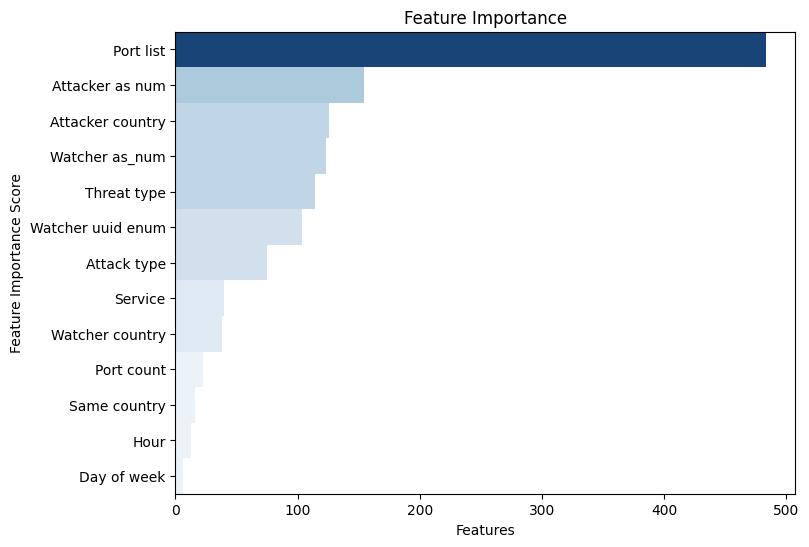

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(y='Category',
            x='Weight',
            data=authentic_weights_df,
            width=1,
            orient='h',
            palette=(colors_from_values(authentic_weights_df['Weight'],'Blues'))
            )
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.show()

# Archivos CSV de las predicciones

Los archivos csv de las predicciones se encuentran en el siguiente enlace: https://drive.google.com/drive/folders/189OwWzV26vH0L5Ubf3POpyDzAz8BbloI?usp=sharing